In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Definamos el sistema en una tupla
G=(lambda x,y,z: 3*x - np.cos(y*z) - 1.5, \
   lambda x,y,z: 4*x**2 - 625*y**2 + 2*y -1, \
   lambda x,y,z: np.exp(-x*y) + 20*z + 9.471975 )

In [6]:
for i in range(3):
    print(G[i](0,0,0))

-2.5
-1
10.471975


In [7]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [8]:
GetVectorF(G,[0,0,0])

array([-2.5     , -1.      , 10.471975])

In [9]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
        J[i,2] = (  G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

In [11]:
GetJacobian(G,[0,1,-1])

array([[ 3.00000000e+00,  0.00000000e+00, -9.99999999e-01],
       [ 8.41470985e-01, -1.24800000e+03,  0.00000000e+00],
       [-8.41470985e-01,  0.00000000e+00,  2.00000000e+01]])

In [16]:
def NewtonRaphson(G,r,error=1e-10):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF(G,r)
        J = GetJacobian(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        print(diff)
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it,Vector_d


In [19]:
r,it,distancias = NewtonRaphson(G,[1,2,3])
print(r,it)

[ 2.17430801 -0.99854276 -3.41961198]
[ 1.59341957 -0.46825817 -0.02351798]
[-2.28137304 -0.13079838 -0.04864096]
[-0.6441987  -0.15315556 -0.00276061]
[-0.60289101 -0.08327236 -0.01158206]
[-0.21861403 -0.05715138 -0.00834189]
[-0.10640755 -0.02996594 -0.00391954]
[-0.04627122 -0.01433974 -0.00175341]
[-0.02134314 -0.00583189 -0.0007497 ]
[-0.00814856 -0.0023512  -0.00029789]
[-0.00338251 -0.00085432 -0.00011624]
[-1.14001569e-03 -3.43349877e-04 -4.29453040e-05]
[-5.06690781e-04 -1.15006341e-04 -1.66395526e-05]
[-1.42147318e-04 -5.07797333e-05 -5.88271620e-06]
[-8.08649869e-05 -1.42580781e-05 -2.38966292e-06]
[-1.36130160e-05 -8.08871957e-06 -7.74428223e-07]
[-1.48889495e-05 -1.36664683e-06 -3.57731846e-07]
[ 2.81102599e-07 -1.48812002e-06 -9.22674742e-08]
[-3.35814713e-06  2.68645592e-08 -5.87695722e-08]
[ 8.05575948e-07 -3.35373730e-07 -7.41596684e-09]
[-9.21723048e-07  8.01881271e-08 -1.13682986e-08]
[ 3.82372030e-07 -9.19933982e-08  8.74915473e-10]
[-2.88688835e-07  3.81159754e-08

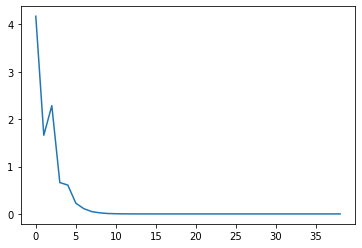

In [20]:
plt.plot(distancias)

In [15]:
np.round(GetVectorF(G,r))

array([-0., -0., -0.])